# **Advanced AI Coursework**
*B716460*

Aims for this report:
* Implementation of a Convolutional Neural Network.
* Implementation of a Recurrent Neural Network.
* Results from a range of different parameters.
* Produce varying comparisons of the two architectures and how they differ.

## **Dataset Generation**

Get the CIFAR-10 dataset from the Keras API, and convert the downloaded dataset labels to a binary class matrix for faster processing.

Where it states; 

`(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()`

All necessary testing and training images, along with their associated labels to represent its particular class. In this case there are 10 classes used for image classification.

Once the builtin MNIST dataloader has been executed, then the associated labels from both the training and testing sets are converted to binary matrices

The MNIST dataset comes pre-normalised, so normalisation on the given set is not required.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
# Using the builtin DataLoader from Tensorflow framework.

training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])
# Reshape the data to have a single dimension for individual images to have compatibility with Alexnet CNN.
# Reshaped to ((number of images)*28x28*1).

training_labels = tf.keras.utils.to_categorical(training_labels)
testing_labels = tf.keras.utils.to_categorical(testing_labels)

## **Validation Set Generation**

Split the training dataset into a smaller training dataset so we can extract a validation dataset for training future neural networks.

More specifically, the training dataset will be sliced to create a validation data set.

Overall, the MNIST dataset will consist of a training set, a validation set and a testing set. This will provide a non-bias means of validating the accuracy and loss values from our model.

In [2]:
# Generate the validation set from the training set via appending a subset of training data to the validation set.
validation_images = training_images[-10000:]
validation_labels = training_labels[-10000:]



# Finally, removing said data from the training set.
training_images = training_images[:-10000]
training_labels = training_labels[:-10000]

## **AlexNet Model**

Source code below is an implementation of a Convolutional Neural Network model, more specifically the well known AlexNet model.

Keras API sequential neural network model. This sequential model follows the AlexNet structure but has
been tweaked to conform with the MNIST's dataset image shape.

[AlexNet Source Code](https://medium.com/analytics-vidhya/alexnet-tensorflow-2-1-0-d398b7c76cf)

Original model was taken from this article and modified to adjust to the shape of the MNIST dataset (28x28x1 to account for grayscale).

In [3]:
def generate_alexnet_model():
    return tf.keras.models.Sequential(
      [
        # 1st layer
        tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
        # 2nd layer
        tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 3rd layer
        tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 4th layer
        tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        # 5th layer
        tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
        # To Flatten layer
        tf.keras.layers.Flatten(),
        # To FC layer 1
        tf.keras.layers.Dense(4096, activation='relu'),
        #To FC layer 2
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(testing_labels.shape[1], activation='softmax')
      ]
    )

alexnet_model = generate_alexnet_model()

## **AlexNet Model Compilation and Summary**

Compile the model and print a summary results list of the given model.

In [4]:
alexnet_model.compile(optimizer='Adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 5, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 96)          384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 256)         2973952   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 384)         1

## **AlexNet Model Fitting**

Along with the maximum number of epochs defined for both future model training, the model fitting stage is shown below, along with the given loss functions and accuracies against the training set and validation set.

In [5]:
max_epochs = 10

alexnet_history = alexnet_model.fit(
    training_images, 
    training_labels, 
    epochs=max_epochs, 
    validation_data=(validation_images, validation_labels),
    batch_size=128
    )


Epoch 1/10
391/391 [==============================] - 35s 76ms/step - loss: 0.7199 - accuracy: 0.8400 - val_loss: 0.1237 - val_accuracy: 0.9662
Epoch 2/10
391/391 [==============================] - 23s 60ms/step - loss: 0.1085 - accuracy: 0.9700 - val_loss: 0.1110 - val_accuracy: 0.9711
Epoch 3/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0871 - accuracy: 0.9768 - val_loss: 0.1182 - val_accuracy: 0.9669
Epoch 4/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0702 - accuracy: 0.9810 - val_loss: 0.1416 - val_accuracy: 0.9637
Epoch 5/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0575 - accuracy: 0.9844 - val_loss: 0.0879 - val_accuracy: 0.9785
Epoch 6/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0486 - accuracy: 0.9870 - val_loss: 0.1132 - val_accuracy: 0.9749
Epoch 7/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 0.0955 - val_accuracy:

## **AlexNet CNN Model Evaluation and Results**

Plotting the models data to represent the loss value against its training data and the validation data. Using the testing set which comprises of the image dataset and its associated labels, running the 'model.evaluate' function will produces accurate results as to how the model performs in image classification on an unknown dataset.

Method returns a list object, where it can be stored and compared against future model evaluations.

In [6]:
alexnet_results = alexnet_model.evaluate(testing_images, testing_labels)

print('AlexNet Model loss: %s \nAlexNet Model Accuracy: %s' % (alexnet_results[0], alexnet_results[1]))

313/313 [==============================] - 5s 11ms/step - loss: 0.1006 - accuracy: 0.9777
AlexNet Model loss: 0.10062816739082336 
AlexNet Model Accuracy: 0.9776999950408936


## **AlexNet Loss Graph Analysis**

The first graph to show after `model.fit()` has been executed is shown below. 

The graphs below show the history of the training and validation phase in relation to its loss function values and accuracy values per epoch.

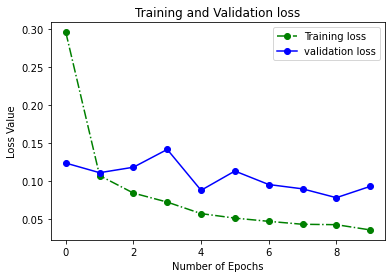

In [7]:
epochs = range(0, max_epochs)
# Using the max_epochs constant to create an iterable object of the range of epochs to generate valid X axes.

plt.plot(epochs, alexnet_history.history['loss'], 'go-.', label='Training loss')
plt.plot(epochs, alexnet_history.history['val_loss'], 'bo-', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## **AlexNet Accuracy Graph Analysis**

This graph, where accuracy values are plotted in relation to its given epoch.

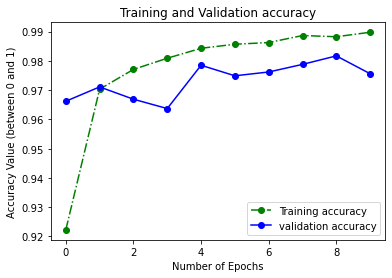

In [8]:
plt.plot(epochs, alexnet_history.history['accuracy'], 'go-.', label='Training accuracy')
plt.plot(epochs, alexnet_history.history['val_accuracy'], 'bo-', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value (between 0 and 1)')
plt.legend()

plt.show()

*Alexnet implementation complete and results shown.*

# **Recurrent Neural Network**


## **Dataset Preprocessing**

Recurrent Neural Network expects a sequence of 28x28 images in that case, and current the sets are of a shape ((number of images) x 28 x 28 x 1) so trimming the 4th dimension is necessary for compatibility.

Since the same loss function (Categorical Crossentropy) is being used to compile this model, then the labels in the binary matrix format are still suitable and do not need modification.

In [9]:
testing_images = testing_images[:, :, :, 0]
training_images = training_images[:, :, :, 0]
validation_images = validation_images[:, :, :, 0]

## **RNN Neural Network Model**

Source code below is an implementation of a given Recurrent Neural Network Model. 

In [10]:
def generate_rnn_model():
    return tf.keras.Sequential(
        [
            # 1st layer
            tf.keras.layers.SimpleRNN(128, input_shape=(None, 28), dropout=0.2, return_sequences=True),
            tf.keras.layers.BatchNormalization(),

            # 2nd layer
            tf.keras.layers.SimpleRNN(128, dropout=0.2),
            tf.keras.layers.BatchNormalization(),

            # Fully Connected Layer
            tf.keras.layers.Dense(10), # 0 to 9 Labels.
            tf.keras.layers.Activation('softmax')
        ]
    )

rnn_model = generate_rnn_model()

## **RNN Model Compilation**

Compiling the model using the same loss function and optimizer as the AlexNet CNN to provide accurate comparisons between the two architectures.

In [11]:
rnn_model.compile(optimizer='Adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 128)         20096     
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 128)         512       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 55,306
Trainable params: 54,794
Non-trainable params: 512
________________________________________________

## **RNN Model Fitting**

The model fitting stage is shown below, along with the given loss functions and accuracies against the training set and validation set.

In [12]:
rnn_history = rnn_model.fit(
    training_images, 
    training_labels, 
    epochs=max_epochs, 
    validation_data=(validation_images, validation_labels),
    batch_size=128
    )

Epoch 1/10
391/391 [==============================] - 12s 26ms/step - loss: 1.6041 - accuracy: 0.4429 - val_loss: 0.6401 - val_accuracy: 0.7780
Epoch 2/10
391/391 [==============================] - 10s 25ms/step - loss: 0.6557 - accuracy: 0.7802 - val_loss: 0.3815 - val_accuracy: 0.8769
Epoch 3/10
391/391 [==============================] - 10s 25ms/step - loss: 0.4732 - accuracy: 0.8482 - val_loss: 0.3111 - val_accuracy: 0.8996
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 0.4021 - accuracy: 0.8707 - val_loss: 0.2482 - val_accuracy: 0.9231
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 0.3561 - accuracy: 0.8873 - val_loss: 0.2305 - val_accuracy: 0.9293
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 0.3049 - accuracy: 0.9057 - val_loss: 0.1990 - val_accuracy: 0.9419
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2788 - accuracy: 0.9137 - val_loss: 0.1799 - val_accuracy:

## **RNN Model Evaluation**

Plotting the model's data to represent the loss value against its training data and the validation data. Using the testing set which consists of the image dataset and its associated labels, running the 'model.evaluate' function will produces accurate results as to how the model performs in image classification on an unknown dataset.

Method returns a list object, where it can be stored and compared against future model evaluations.

In [13]:
rnn_results = rnn_model.evaluate(testing_images, testing_labels)

print('\nAlexNet Model loss: %s \n\nAlexNet Model Accuracy: %s' % (rnn_results[0], rnn_results[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.1567 - accuracy: 0.9542

AlexNet Model loss: 0.1566835641860962 

AlexNet Model Accuracy: 0.954200029373169


## **RNN Loss Graph Analysis**

Also, worth noting that, the validation loss didn't necessarily make any significant improvements beyond 4 epochs.

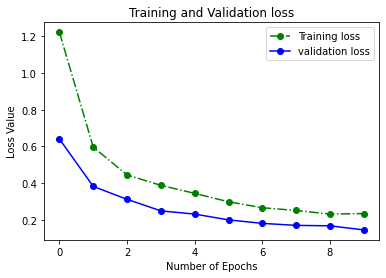

In [14]:
epochs = range(0, max_epochs)
# Using the max_epochs constant to create an iterable object of the range of epochs to generate valid X axes.

plt.plot(epochs, rnn_history.history['loss'], 'go-.', label='Training loss')
plt.plot(epochs, rnn_history.history['val_loss'], 'bo-', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## **RNN Accuracy Graph Analysis**

Lastly, the graph shown below displays the accuracy values per epoch given from the Training dataset and validation dataset.

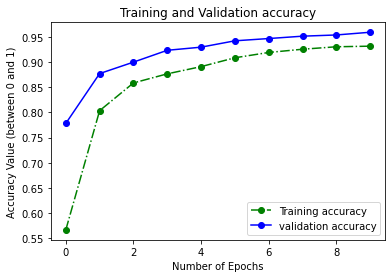

In [15]:
plt.plot(epochs, rnn_history.history['accuracy'], 'go-.', label='Training accuracy')
plt.plot(epochs, rnn_history.history['val_accuracy'], 'bo-', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value (between 0 and 1)')
plt.legend()

plt.show()

# **Neural Network Parameter Adjustments**

The graphs shown below are cases of RNN models and CNN Models, where the learning rate, and the choice of optimisers are adjusted at various intervals to find the best performing combinations.

In this case, they will be fitted on 4 epoch cycles, as through previous tests it has shown that negligible increases in performance, if any, are given from increasing this value.

Here a new class has been written to alleviate some of the work of producing so much data from various learning rates and optimizers.
This class allows you to specify the number of learning rates and optimizers in two lists, and iterate over all possibilities and collect the values from each model produced.

In [16]:
max_epochs = 4

class NNModelParameters:

    def __init__(self):

        self.optimizer_values = {}
        self.histories = []
        self.evaluations = []
        self.max_epochs = 4

        self.learning_rates = [
            0.01,
            0.001,
            0.0001]

        self.optimizers = {
            'Adam': tf.keras.optimizers.Adam,
            'SGD': tf.keras.optimizers.SGD,
            'RMSprop': tf.keras.optimizers.RMSprop}

    def generate_optimizer_values(self):
        for optimizer_key, optimizer_value in self.optimizers.items():
            for i, rate in enumerate(self.learning_rates):
                optimizer_name = f'{optimizer_key}_rate-{i}'
                self.optimizer_values[
                    optimizer_name] = optimizer_value(learning_rate=rate)
                print('Generated Optimizer: %s' % optimizer_name)

    def generate_histories(self, model_type):
        # Requires `generate_optimizer_values` to have been executed.
        for optimizer_value in self.optimizer_values:

            model = eval('generate_' + model_type + '_model()')
            generate_alexnet_model()

            model.compile(
                optimizer=self.optimizer_values[optimizer_value],
                loss='CategoricalCrossentropy',
                metrics=['accuracy'])
            print('Finished compiling model with optimizer %s, moving on to fitting...' % optimizer_value)

            self.histories.append(model.fit(training_images,
                training_labels,
                epochs=max_epochs,
                validation_data=(validation_images, validation_labels),
                batch_size=128,
                verbose=0))

            print('Fitting Done. Evaluating %s' % optimizer_value)
            self.evaluations.append(
                model.evaluate(testing_images, testing_labels))

    def get_histories(self):
        return self.histories

    def get_evaluations(self):
        return self.evaluations

### Graph Plotting Function

A helper function is made that will iterate over multiple Tensorflow history objects and print out their collective values surrounding its loss and accuracy values during fitting.

In [28]:
epochs = range(1,5)

def plot_graph(title, histories, graph_type, labels):

    colours = ['r', 'g', 'b']

    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['val_' + graph_type], colours[i] + 'o-.',
                 label='Testing ' + labels[i] + ' ' + graph_type)
        plt.plot(epochs, history.history[graph_type], colours[i] + 'o-',
                 label='Validation ' + labels[i] + ' ' + graph_type)

    plt.title(title)

    plt.xlabel('Number of Epochs')
    plt.ylabel(graph_type + ' Value')
    plt.legend()

    plt.show()

## **Alexnet CNN Dataset Conversion**

To convert back the dataset format to work with CNN's, adding a 4th dimension for compatibility is required.

In [29]:
training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])
validation_images = validation_images.reshape(list(validation_images.shape) + [1])
# Reshape the data to have a single dimension for individual images to have compatibility with AlexNet CNN.
# Reshaped to ((number of images)*28x28*1).


## **Alexnet Parameter Tuning**

Instantiation of the new Neural Network parameter object is done below, it will generate various models based on alexnet.

In [19]:
alexnet_mp = NNModelParameters()
alexnet_mp.generate_optimizer_values()
alexnet_mp.generate_histories('alexnet')

Generated Optimizer: Adam_rate-0
Generated Optimizer: Adam_rate-1
Generated Optimizer: Adam_rate-2
Generated Optimizer: SGD_rate-0
Generated Optimizer: SGD_rate-1
Generated Optimizer: SGD_rate-2
Generated Optimizer: RMSprop_rate-0
Generated Optimizer: RMSprop_rate-1
Generated Optimizer: RMSprop_rate-2
Finished compiling model with optimizer Adam_rate-0, moving on to fitting...
Fitting Done. Evaluating Adam_rate-0
313/313 [==============================] - 3s 11ms/step - loss: 0.1854 - accuracy: 0.9472
Finished compiling model with optimizer Adam_rate-1, moving on to fitting...
Fitting Done. Evaluating Adam_rate-1
313/313 [==============================] - 3s 11ms/step - loss: 0.1322 - accuracy: 0.9702
Finished compiling model with optimizer Adam_rate-2, moving on to fitting...
Fitting Done. Evaluating Adam_rate-2
313/313 [==============================] - 4s 11ms/step - loss: 0.0789 - accuracy: 0.9776
Finished compiling model with optimizer SGD_rate-0, moving on to fitting...
Fitting D

## **AlexNet History and Label Graph Preprocessing**

All the returned values that have been generated are plotted here.

In [30]:
alexnet_histories = alexnet_mp.get_histories()

alexnet_adam_labels = ['Adam 0.01', 'Adam 0.001', 'Adam 0.0001']

alexnet_sgd_labels = ['SGD 0.01', 'SGD 0.001', 'SGD 0.0001']

alexnet_rmsprop_labels = ['RMSprop 0.01', 'RMSprop 0.001', 'RMSprop 0.0001']

## **Alexnet Parameters Loss Graph Analysis**

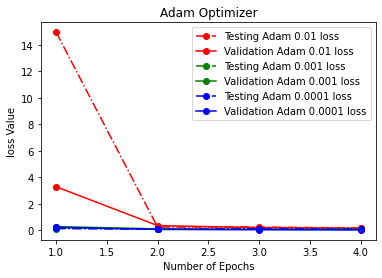

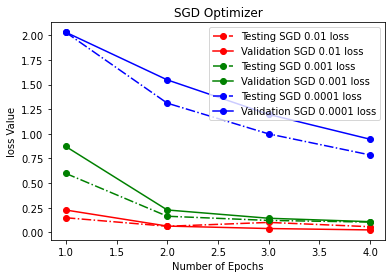

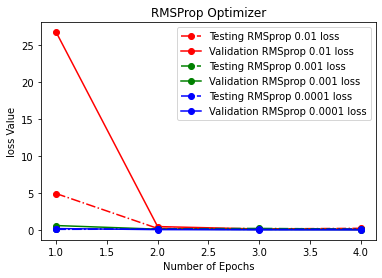

In [31]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'loss', alexnet_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'loss', alexnet_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'loss', alexnet_rmsprop_labels)

## **Alexnet Parameters Accuracy Graph Analysis** 

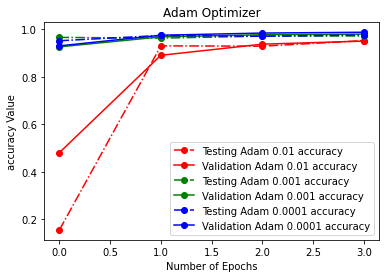

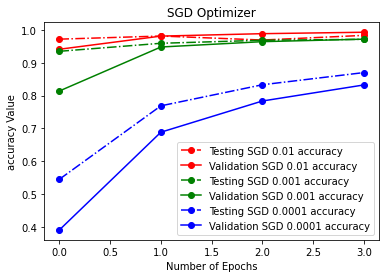

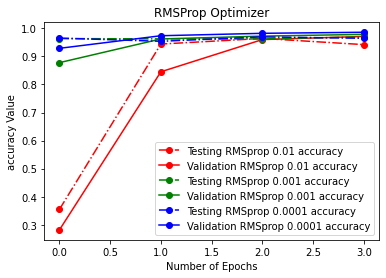

In [22]:
plot_graph('Adam Optimizer', alexnet_histories[0:3], 'accuracy', alexnet_adam_labels)
plot_graph('SGD Optimizer', alexnet_histories[3:6], 'accuracy', alexnet_sgd_labels)
plot_graph('RMSProp Optimizer', alexnet_histories[6:9], 'accuracy', alexnet_rmsprop_labels)

## **RNN Dataset Conversion**

For the datasets to work with RNN's, the 4th dimension is to be stripped since it expects a sequence of values.

In [23]:
training_images = training_images[:, :, :, 0]
testing_images = testing_images[:, :, :, 0]
validation_images = validation_images[:, :, :, 0]

## **RNN Parameter Tuning**

A RNN based neural network Model Parameters object is instantiated here and generates data surrounding RNN's.

In [24]:
rnn_mp = NNModelParameters()
rnn_mp.generate_optimizer_values()
rnn_mp.generate_histories('rnn')

Generated Optimizer: Adam_rate-0
Generated Optimizer: Adam_rate-1
Generated Optimizer: Adam_rate-2
Generated Optimizer: SGD_rate-0
Generated Optimizer: SGD_rate-1
Generated Optimizer: SGD_rate-2
Generated Optimizer: RMSprop_rate-0
Generated Optimizer: RMSprop_rate-1
Generated Optimizer: RMSprop_rate-2
Finished compiling model with optimizer Adam_rate-0, moving on to fitting...
Fitting Done. Evaluating Adam_rate-0
313/313 [==============================] - 1s 4ms/step - loss: 1.6515 - accuracy: 0.3959
Finished compiling model with optimizer Adam_rate-1, moving on to fitting...
Fitting Done. Evaluating Adam_rate-1
313/313 [==============================] - 1s 4ms/step - loss: 0.2671 - accuracy: 0.9190
Finished compiling model with optimizer Adam_rate-2, moving on to fitting...
Fitting Done. Evaluating Adam_rate-2
313/313 [==============================] - 1s 4ms/step - loss: 1.1415 - accuracy: 0.5763
Finished compiling model with optimizer SGD_rate-0, moving on to fitting...
Fitting Done

## **RNN History and Label Graph Preprocessing**

Getting all the assoiciated data from this parameters object and plotting it against loss graphs and accuracy graphs.

In [25]:
rnn_histories = rnn_mp.get_histories()

rnn_adam_labels = ['Adam 0.01', 'Adam 0.001', 'Adam 0.0001']

rnn_sgd_labels = ['SGD 0.01', 'SGD 0.001', 'SGD 0.0001']

rnn_rmsprop_labels = ['RMSprop 0.01', 'RMSprop 0.001', 'RMSprop 0.0001']

## **RNN Parameters Loss Graph Analysis**

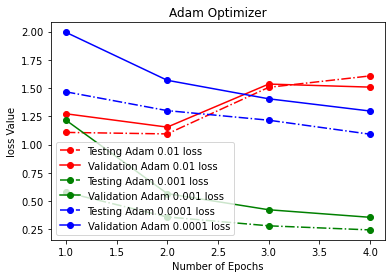

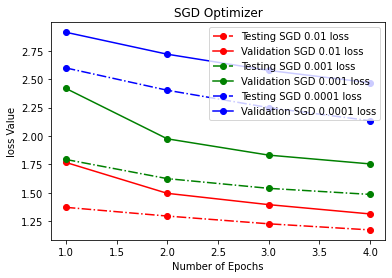

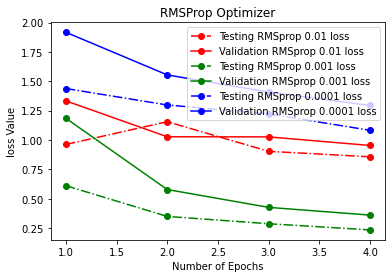

In [32]:
plot_graph('Adam Optimizer', rnn_histories[0:3], 'loss', rnn_adam_labels)
plot_graph('SGD Optimizer', rnn_histories[3:6], 'loss', rnn_sgd_labels)
plot_graph('RMSProp Optimizer', rnn_histories[6:9], 'loss', rnn_rmsprop_labels)

## **RNN Parameters Accuracy Graph Analysis**

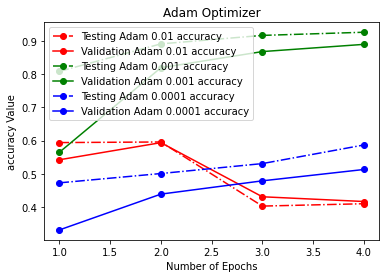

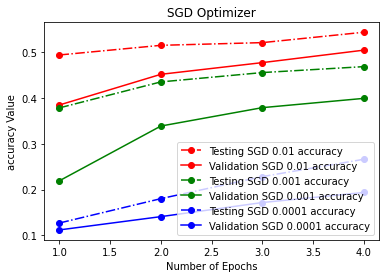

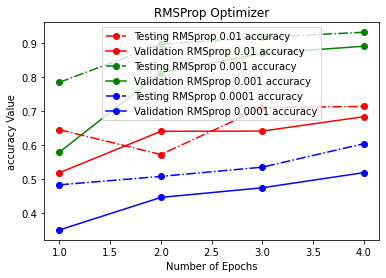

In [33]:
plot_graph('Adam Optimizer', rnn_histories[0:3], 'accuracy', rnn_adam_labels)
plot_graph('SGD Optimizer', rnn_histories[3:6], 'accuracy', rnn_sgd_labels)
plot_graph('RMSProp Optimizer', rnn_histories[6:9], 'accuracy', rnn_rmsprop_labels)